# Phase 3 Notes

## OOP Object Oriented Programming

In [ ]:
#to create a class
class ExampleClass:
    pass #at a minimum an empty class must contain pass

In [ ]:
class Dog:
    
    def bark(self):
        return 'I am actually going to bark this time. bark!'
        
    def who_am_i(self):
        return self

In [ ]:
#how to use a class and the defined instance methods
rex = Dog()
print(rex.bark())
print(rex.who_am_i())
rex == rex.who_am_i()

Attributes = Fields, properties of object insatance

##### Example of super and subclasses

In [ ]:
class Musician(object):
    
    def __init__(self, name): # We'll set name at instantiation time to demonstrate passing in arguments to super().__init__()
        self.name = name
        self.band = "The Beatles"
    
    def tune_instrument(self):
        print("Tuning Instrument!")
    
    def practice(self):
        print("Practicing!")
        
    def perform(self):
        print("Hello New York!")
        
class Singer(Musician):
    
    def __init__(self, name):
        super().__init__(name)  # Notice how we pass in name argument from init to the super().__init() method, because it expects it
        self.role = "Singer"
        
    def tune_instrument(self):
        print("No tuning needed -- I'm a singer!")
    
class Guitarist(Musician):
    
    def __init__(self, name):
        super().__init__(name)
        self.role = "Guitarist"
        
    def practice(self):
        print("Strumming the old 6 string!")
        
class Bass_Guitarist(Guitarist):
    
    def __init__(self, name):
        super().__init__(name)
        self.role = "Bass Guitarist"
        
    def practice(self):
        print("I play the Seinfeld Theme Song when I get bored")
        
    def perform(self):
        super().perform()
        print("Thanks for coming out!")
        
class Drummer(Musician):
    
    def __init__(self, name):
        super().__init__(name)
        self.role = "Drummer"
        
    def tune_instrument(self):
        print('Where did I put those drum sticks?')
        
    def practice(self):
        print('Why does my chair still say "Pete Best"?')

## Calculus

Derivative: $$ \frac{df(x)}{dx} $$

The instaneous slope of $f(x)$ at $x = c$.

Define as limit of slope of chord between f(x + h) and f(x): $$\frac{\Delta y}{\Delta x} $$ 
- As $\Delta x \rightarrow 0$.

Finding $w_1$ minimizing cost function:

$$L = \sum_{i=1}^N (y_i - x_i w_1)^2 $$

#### Variables

w = weight

L = the parabola this function represents

delta r = displacment vector

inverted delta f = gradient

gradient is a slope, specifically the slope of the changing slope? aka acceleration? aka slope of non-linear functions?

gradient descent: find a random point. then check around it in steps to find the largest slope, aka gradient, and go in opposite direction to continuely find the slope "largest slope" smaller and smaller until it settles in the minimum point in the parabaloid/nth dimensional shape.

w0 is bias

w1 is a feature/ vector of slope of features?

beta0 is gradient?

RSS is residual sum of squares: level of variance in a regression model in units of residuals/error term. The sum of the squared value of x, y, m, and b. the sum of errors squared

RMSE is root mean squared error: the average error between a data point and the regression line

m = slope

b = y-int

b = bias

Residual is how far off a datapoint is from out regression line. in units of relavant variable (ex: $, lbs, mph, etc...)

$\hat{y}$ = predicted value of y

## Gradient Descent

In [ ]:
conda install -c anaconda sympy

In [ ]:
from sympy import *
from sympy.abc import x, y

x, y, i, N, w1 = symbols("x, y, i, N, w1")
L = summation((Indexed('y',i) - Indexed('x',i)*w1)**2 ,(i,1,N))
L

In [ ]:
grad = diff(L, w1) #derivative of L with respect to w1
grad

99 percent of problems will be solved with gradient descent

In [ ]:
def init_weight(X): #ask about this later. Does this create a normal distribution/weight for all features/values in said features?
    num_features = X.shape[1]
    w_0 = np.random.normal(loc =0 , 
                           scale = 4, 
                           size = (num_features,
                                   1))
    
    return w_0
    

## Logistic Regression

- Don't model the target labels $y$ vs features $X$ directly
- Model the probability $P(sex = 1| mass)$ 
- we only need to focus on one sex because it is binary, and the other probabilty is one minus this

#### Vanilla Logistic Regression

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into X and y
y = df["target"]
X = df.drop(columns = ["target"], axis = 1)

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = .25)

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

#### Decision criterion of classifier based on probability

- When $P(sex = 1| mass) > 0.5 \rightarrow$ Class 1
- When $P(sex = 1| mass) \leq 0.5 \rightarrow$ Class 0

For a single feature $X$, the sigmoid function takes a form:

$$ \sigma(x | w_1, w_0) = \frac{1}{1 + exp\Big[-(w x + b)\Big]} $$

where $w$ is a weight parameter and $b$ is a bias parameter.

#### Logistic Regression in higher dimensions

w/weight is vector, and the perpindicular line is the descision boundry 

### Confusion Matrix

**_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

**_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

**_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

**_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

In [ ]:
from sklearn.metrics import confusion_matrix
example_labels = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
example_preds  = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

cf = confusion_matrix(example_labels, example_preds)
cf

The predictions/labels are either 0 or 1. The confusion matrix shows:

- 2 values of 0 were correctly predicted as 0
- 3 values of 0 were falsely predicted as 1
- 2 values of 1 were falselt predicted as 0
- 4 values of 1 were correctly predicted as 1

In [ ]:
# Visualize your confusion matrix
from sklearn.metrics import plot_confusion_matrix
pcf = plot_confusion_matrix(estimator= logreg, y_true = y_test, X = X_test)

#### Evaluation Metrics

- Precision measures how precise the predictions are
- Recall indicates what percentage of the classes we're interested in were actually captured by the model. 

$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $    

$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $

aka true positives / true positives plus false negatives
  
$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $

$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $
F1 score represents the Harmonic Mean of Precision and Recall
this means that the F1 score cannot be high without both precision and recall also being high

You can find the classification_report() function in the sklearn.metrics module, which takes labels and predictions and returns the precision, recall, F1 score and support (number of occurrences of each label in y_true) for the results of a model. 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print(precision_score(y_test,y_hat_test))
print(precision_score(y_train,y_hat_train))

print(recall_score(y_test,y_hat_test))
print(recall_score(y_train,y_hat_train))

print(accuracy_score(y_test,y_hat_test))
print(accuracy_score(y_train,y_hat_train))

print(f1_score(y_test,y_hat_test))
print(f1_score(y_train,y_hat_train))

In [ ]:
from sklearn.model_selection import train_test_split
>>> X_train, X_test, y_train, y_test = train_test_split(
...         X, y, random_state=0)

### ROC Curve

ROC (reciever operator characteristic) is named for/was identified during world war 2 to identify japanease planes

#### Variables

- $\alpha$ is the false positive rate (reject null when null is true)
- $\beta$ is false negative rate (accept null when null is false)

$\alpha$ and $\beta$ depends on:
- significance level
- the structure of the hypothesis test (distribution, type of test, etc.)
- the data (sample size, etc.)

- True positive rate: $$ \frac{TP}{TP+FN}$$

Rate of correctly rejecting null (statistical power)

- False positive rate: $$ \frac{FP}{FP+TN}$$

Rate of falsely rejecting null (Type I error)

Choose optimal threshold that maximizes:
    
$$ J = TPR - FPR $$

Want as many true positive identifcations while minimizing false positives 

**Known as Youden's J-statistic**

It is recomennded to do a confusion matrix and classification report on the new y_pred_thresh against our initial y_test

#### Code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

In [ ]:
hd_data = pd.read_csv('Phase3_Topic26_Classification_Metrics/Data/heart.csv')
hd_data.info()

In [ ]:
# Separate data into feature and target DataFrames
hd_X = hd_data.drop('target', axis=1)
hd_y = hd_data['target']

hd_X.head()

In [ ]:
hd_y.value_counts() # 1 = heart disease

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(hd_X, hd_y, test_size=.25,
                                                   random_state=1)
# Scale the data for modeling
hd_scaler = StandardScaler()
hd_scaler.fit(X_train)
X_train_sc = hd_scaler.transform(X_train)
X_test_sc = hd_scaler.transform(X_test)

# Train a logistic regresssion model with the train data
hd_model = LogisticRegression()
hd_model.fit(X_train_sc, y_train)

In [ ]:
y_pred = hd_model.predict(X_test_sc)
y_pred[:10]

In [ ]:
y_prob = hd_model.predict_proba(X_test_sc)
y_prob[:5]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

In [ ]:
thresholds[1::]

In [ ]:
thresh_df = pd.DataFrame({'threshold': thresholds,
                          'tpr':  tpr, 'fpr': fpr}).iloc[1::, :]
thresh_df.head()

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (9,4))
thresh_df.plot(x = 'threshold', y = 'tpr', ax = ax[0])
thresh_df.plot(x = 'threshold', y = 'fpr', ax = ax[0])
thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax[1], label = 'ROC')
ax[1].set_ylabel('True positive rate')
ax[1].set_xlabel('False positive rate')
plt.tight_layout()

In [ ]:
plot_roc_curve(hd_model, X_test_sc, y_test)

In [ ]:
thresh_df['J_stat'] = \
thresh_df['tpr'] - thresh_df['fpr']
thresh_df.head()

In [ ]:
thresh_df.plot(x = 'threshold', y= 'J_stat')

In [ ]:
max_selector = \
thresh_df.index == thresh_df['J_stat'].idxmax()

optimal_thresh = thresh_df[max_selector]
optimal_thresh

In [ ]:
fig, ax = plt.subplots()
thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax, label = 'ROC')
optimal_thresh.plot.scatter(x = 'fpr', y = 'tpr', c ='r', s = 100, ax = ax, label = 'optimal' )
plt.show()

In [ ]:
thresh = optimal_thresh['threshold'].values
# yes...this is the way to do it for binary class.
y_pred_with_threshold = (y_prob[:,1] >= thresh).astype(int)
y_pred_with_threshold

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
# Extract the probabilitiy predictions for the "1" class (heart disease)
y_hat_hd = y_prob[:, 1]

roc_auc_score(y_test, y_hat_hd)

In [ ]:
k = 10
C_list = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4]
k_list = np.arange(k)
cv_scores = []

for c in C_list :
    logreg = LogisticRegression(C = c)
    cv_loop_results = cross_validate(
                X=X_train_sc, 
                y=y_train,
                estimator=logreg, 
                cv=k,
                scoring=('roc_auc')) #the scoring is the roc auc
    cv_scores.append(dict(zip(k_list,cv_loop_results['test_score'])))
    
cv_score_df = pd.DataFrame(cv_scores) 
cv_score_df['C'] = C_list
cv_score_df.set_index('C', inplace = True)

In [ ]:
# mean roc auc score
cv_score_df.mean(axis = 1)

Select $C = 0.1$ as best regularization:
- based on ROC-AUC score

In [ ]:
logreg_best = LogisticRegression(C = 0.1)
logreg_best.fit(X_train_sc, y_train)

In [ ]:
y_pred_probs = logreg_best.predict_proba(X_test_sc)

In [ ]:
y_pred = logreg_best.predict(X_test_sc)
y_pred

In [ ]:
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_probs[:,1])
bestmod_thresh_df = pd.DataFrame({'threshold': thresholds_best,
                          'tpr':  tpr_best, 'fpr': fpr_best, 'J_stat': tpr_best - fpr_best}).iloc[1::, :]
bestmod_thresh_df.head()

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (9,4))
bestmod_thresh_df.plot(x = 'threshold', y = 'tpr', ax = ax[0])
bestmod_thresh_df.plot(x = 'threshold', y = 'fpr', ax = ax[0])
bestmod_thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax[1], label = 'ROC')
ax[1].set_ylabel('True positive rate')
ax[1].set_xlabel('False positive rate')
plt.tight_layout()

In [ ]:
best_idx = bestmod_thresh_df['J_stat'].idxmax()
best_point = pd.DataFrame(bestmod_thresh_df.iloc[best_idx]).T
best_point

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (9,4))
bestmod_thresh_df.plot(x = 'threshold', y = 'tpr', ax = ax[0])
bestmod_thresh_df.plot(x = 'threshold', y = 'fpr', ax = ax[0])
ax[0].axvline(best_point['threshold'].values, c = 'r', linestyle = '--')

bestmod_thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax[1], label = 'ROC')
best_point.plot.scatter(x = 'fpr', y = 'tpr', ax = ax[1], c ='r', s = 100, label = 'Optimal')
ax[1].set_ylabel('True positive rate')
ax[1].set_xlabel('False positive rate')

plt.tight_layout()

In [ ]:
#filter on class 1 probabilities
y_pred_best_with_threshold = (y_pred_probs[:,1] >= 0.4).astype(int)
y_pred_best_with_threshold

In [ ]:
print(classification_report(y_test, y_pred_best_with_threshold))

In [ ]:
conf_mat_best = confusion_matrix(y_test, y_pred_best_with_threshold)
fig, ax = plt.subplots()
sns.heatmap(conf_mat_best, annot = True, ax = ax)
ax.set_ylabel(r'$y_{true}$', size = 15)
ax.set_xlabel(r'$y_{pred}$', size = 15)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_best_with_threshold))

### K Nearest neighbors and dimentionality

 $k$: number of neighbors
 
 low $k$ = low bias, high varience model
 
 high $k$ = high bias, low varience : too rigid/not sensative enough

#### Code

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
iris_df = pd.read_csv('Phase3_Topic28_KNearest_Neighbors_Curse_of_Dimensionality//Data/Iris.csv').drop(columns = ['Id'])
iris_df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_transform = LabelEncoder()
iris_df['Species'] = target_transform.fit_transform(iris_df['Species'])

In [ ]:
sns.pairplot(hue = 'Species', data = iris_df, height = 1.75)
plt.show()

In [ ]:
sns.scatterplot(y = 'SepalWidthCm', x = 'PetalWidthCm', hue = 'Species', data = iris_df)
plt.show()

In [ ]:
# so whats next?
X = iris_df[['SepalWidthCm', 'PetalWidthCm']]
y = iris_df['Species']

In [ ]:
# shuffle and split, stratify keeps target distribution same in train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = 42)

In [ ]:
#train_test_split(X, y, stratify = y, test_size = 0.15, random_state = 42) stratify keeps the percentages the same in both the test and train dataset

### Descision Tree

- X / features do not need to be scaled in descision trees
- Can improve with more features
- Entropy is a measure of how evenly mixed a class is. 0 is the lowest, 1 is the highest
- Where probability of all classes is equal, entropy is 1.
- Where entropy is .5 of two items in a class, entropy is 1.


### Pipe?????

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

In [ ]:
iris_df = pd.read_csv('Phase3_Topic30_ModelTuning/Data/Iris.csv').drop(columns = ['Id'])
iris_df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_transform = LabelEncoder()
iris_df['Species'] = target_transform.fit_transform(iris_df['Species'])
iris_df.head()

In [ ]:
col_list = ['SepalWidthCm', 'SepalLengthCm']
X = iris_df[col_list]
y = iris_df['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = 42)

In [ ]:
from sklearn.pipeline import Pipeline

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')


In [ ]:
steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('rf_clf', DecisionTreeClassifier(random_state=42))]

pipeline = Pipeline(steps)


# Train the pipeline (tranformations & predictor)
pipeline.fit(X_train, y_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted = pipeline.predict(X_test)
print(predicted)

In [ ]:
# Can define outside the cross validation
steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('rf_clf', DecisionTreeClassifier(random_state=42))]

model_pipe = Pipeline(steps)
model_pipe

In [ ]:
from sklearn.model_selection import KFold
def cross_validation_pip(X_train, y_train, estimator, num_split = 10):
    
    X_train = X_train.values
    y_train = y_train.values
    
    score_train_list = []
    score_val_list = []
    
    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):
        
        # train and validation splitting 
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        estimator.fit(X_train_fold, y_train_fold)
        
        # now how did we do?
        accuracy_train = estimator.score(X_train_fold, y_train_fold)
        accuracy_val = estimator.score(X_val_fold, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)
    
    return {'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [ ]:
cross_validation_pip(X_train, y_train, pipeline)

In [ ]:
model_pipe.steps

In [ ]:
# pop the decision tree
model_pipe.steps.pop(-1)
# insert knn
model_pipe.steps.append(
['knn', KNeighborsClassifier()])

In [ ]:
model_pipe

#### Final pipe?????

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, plot_confusion_matrix

In [2]:
iris_df = pd.read_csv('Phase3_Topic30_ModelTuning/Data/Iris.csv').drop(columns = ['Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
from sklearn.preprocessing import LabelEncoder
target_transform = LabelEncoder()
iris_df['Species'] = target_transform.fit_transform(iris_df['Species'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
col_list = ['SepalWidthCm', 'SepalLengthCm']
X = iris_df[col_list]
y = iris_df['Species']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = 42)

In [16]:
# let's define a new pipeline object 
steps = [('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

model_pipe = Pipeline(steps)

In [7]:
pipe_grid = {'imputer__strategy': ["mean", "median"],
             'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 18],
             'knn__p': [1, 2, 3, 4]}

# note: default scoring is aaccuracy
gs_pipe = GridSearchCV(estimator=model_pipe, 
                       param_grid=pipe_grid)


Trying different metrics:
- Default scoring was accuracy
- But can try other with scoring = '
- Takes string:
    - 'average_precision'
    - 'balanced_accuracy' (class averaged recall)
    - 'roc_auc', etc.

In [8]:
gs_pipe.fit(X_train, y_train);

In [9]:
gs_pipe.best_params_

{'imputer__strategy': 'mean', 'knn__n_neighbors': 18, 'knn__p': 1}

In [10]:
gs_pipe.best_score_

0.811076923076923

In [11]:
best_model = gs_pipe.best_estimator_
best_model

Pipeline(steps=[('imputer', SimpleImputer()), ('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=18, p=1))])

In [12]:
y_pred = best_model.predict(X_test)

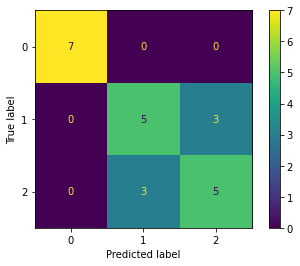

In [13]:
plot_confusion_matrix(best_model, X_test, y_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.62      0.62      0.62         8
           2       0.62      0.62      0.62         8

    accuracy                           0.74        23
   macro avg       0.75      0.75      0.75        23
weighted avg       0.74      0.74      0.74        23



In [15]:
cv_result_df = pd.DataFrame(gs_pipe.cv_results_)
cv_result_df = cv_result_df.sort_values(by = 'rank_test_score')
cv_result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_imputer__strategy,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,0.005135,0.000229,0.003591,0.000802,median,18,1,"{'imputer__strategy': 'median', 'knn__n_neighb...",0.769231,0.846154,0.8,0.76,0.88,0.811077,0.045746,1
28,0.009765,0.000720,0.007288,0.000416,mean,18,1,"{'imputer__strategy': 'mean', 'knn__n_neighbor...",0.769231,0.846154,0.8,0.76,0.88,0.811077,0.045746,1
61,0.006804,0.001159,0.004813,0.002271,median,18,2,"{'imputer__strategy': 'median', 'knn__n_neighb...",0.769231,0.807692,0.8,0.80,0.84,0.803385,0.022577,3
29,0.009893,0.000537,0.007153,0.000316,mean,18,2,"{'imputer__strategy': 'mean', 'knn__n_neighbor...",0.769231,0.807692,0.8,0.80,0.84,0.803385,0.022577,3
62,0.006777,0.000484,0.004696,0.000768,median,18,3,"{'imputer__strategy': 'median', 'knn__n_neighb...",0.769231,0.769231,0.8,0.80,0.84,0.795692,0.026080,5


#### Additional reading

In [ ]:
bayesian hyperparameter optimization hpyeropt